In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
dataset = pd.read_excel("/workspaces/flexpower-task/Data/cleaned_file.xlsx")

# Task 2.1

How much Wind/PV (Solar) Power was forecasted to produced in German in 2021 [in MWh] on Day Ahead (da) and on Intraday (id). Hint: Be careful: you have values in MW on a quarter hourly basis, think how this translates into hourly values.

Each row represents data in a 15-minute interval, so we would have to multiply each of the entries by 0.25 to get the hourly values.

In [94]:
# Wind Power (Day-Ahead Forecast)
dataset["Wind_DA_MWh"] = dataset["Wind Day Ahead Forecast [in MW]"] * 0.25
wind_dayahead = dataset["Wind_DA_MWh"].sum()

# Wind Power (Intraday Forecast)
dataset["Wind_ID_MWh"] = dataset["Wind Intraday Forecast [in MW]"] * 0.25
wind_intraday = dataset["Wind_ID_MWh"].sum()

# PV (Solar) Power (Day-Ahead Forecast)
dataset["PV_DA_MWh"] = dataset["PV Day Ahead Forecast [in MW]"] * 0.25
pv_dayahead = dataset["PV_DA_MWh"].sum()

# PV (Solar) Power (Intraday Forecast)
dataset["PV_ID_MWh"] = dataset["PV Intraday Forecast [in MW]"] * 0.25
pv_intraday = dataset["PV_ID_MWh"].sum()

# Printing the results

print(f"Wind Power (Day-Ahead Forecast) = {wind_dayahead:.2f} MWh")
print(f"Wind Power (Intraday Forecast) = , {wind_intraday:.2f}, MWh")
print(f"PV Power (Day-Ahead Forecast) = , {pv_dayahead:.2f} MWh")
print(f"PV Power (Intraday Forecast) =  {pv_intraday:.2f}, MWh")

Wind Power (Day-Ahead Forecast) = 115395406.25 MWh
Wind Power (Intraday Forecast) = , 113478034.50, MWh
PV Power (Day-Ahead Forecast) = , 46094572.75 MWh
PV Power (Intraday Forecast) =  46689891.50, MWh


The total forecasted Wind and PV power for 2021 in Germany are as follows:

- Wind Power (Day-Ahead Forecast) =  115,395,406.25 MWh
- Wind Power (Intraday Forecast) =  113,478,034.50 MWh
- PV Power (Day-Ahead Forecast) =  46,094,572.75 MWh
- PV Power (Intraday Forecast) =  46,689,891.50 MWh

# Task 2.2

Show the average Wind/Solar production for 2021 over a 24h period for Intraday and Day Ahead (4 lines in one graph).

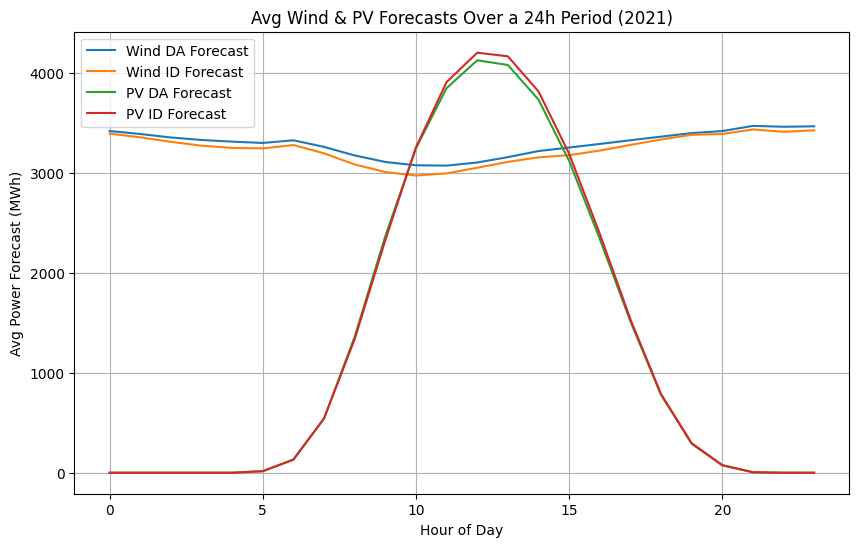

In [89]:
# Grouping the values by hr of day
dataset["hour_of_day"] = dataset["time"].dt.hour
hourly_avg = dataset.groupby("hour_of_day")[["Wind_DA_MWh", "Wind_ID_MWh", "PV_DA_MWh", "PV_ID_MWh"]].mean()

# Plotting the values
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg["Wind_DA_MWh"], label="Wind DA Forecast")
plt.plot(hourly_avg.index, hourly_avg["Wind_ID_MWh"], label="Wind ID Forecast")
plt.plot(hourly_avg.index, hourly_avg["PV_DA_MWh"], label="PV DA Forecast")
plt.plot(hourly_avg.index, hourly_avg["PV_ID_MWh"], label="PV ID Forecast")

plt.xlabel("Hour of Day")
plt.ylabel("Avg Power Forecast (MWh)")
plt.title("Avg Wind & PV Forecasts Over a 24h Period (2021)")
plt.legend()
plt.grid(True)

plt.show()


# Task 2.3
What was the average value [in EUR/MWh] for Wind/Solar Power in 2021 using the da forecast and using da h prices? 

The average value is defined as the average hourly value that a Wind/PV farm owner would have received for their product. 

Is the average value of Wind and PV higher or lower than the average da price? Why could it be higher/lower?


In [90]:
# Average value in 2021 using the da forecast and using the da h prices

dataset["Wind_Revenue_DA"] = dataset["Wind_DA_MWh"] * dataset["Day Ahead Price hourly [in EUR/MWh]"]
dataset["PV_Revenue_DA"] = dataset["PV_DA_MWh"] * dataset["Day Ahead Price hourly [in EUR/MWh]"]

avg_wind_da = dataset["Wind_Revenue_DA"].sum() / dataset["Wind_DA_MWh"].sum()
avg_pv_da = dataset["PV_Revenue_DA"].sum() / dataset["PV_DA_MWh"].sum()


# Overall average price for 2021

avg_da_price = dataset["Day Ahead Price hourly [in EUR/MWh]"].mean()


# Printing the results 

print(f"Average for DA: {avg_da_price: .3f} EUR/MWh")
print(f"Average for Wind (DA): {avg_wind_da:.3f} EUR/MWh")
print(f"Average for PV (DA): {avg_pv_da:.3f} EUR/MWh")





Average for DA:  96.850 EUR/MWh
Average for Wind (DA): 81.387 EUR/MWh
Average for PV (DA): 76.895 EUR/MWh


The average value for Wind/PV Power in 2021 using the da forecast is the following: 

- Average for Wind (DA): 81.387 EUR/MWh
- Average for PV (DA): 76.895 EUR/MWh

Total average value: 

- Average for DA:  96.850 EUR/MWh

Conclusion:

- The average for Wind and PV are both lower than the average for DA
- The reason for lower average prices might be the cannibalization effect, where the higher production of renewable energy would lead to lower market prices. 


# Task 2.4

Find the Day with the highest renewable energy production and with the lowest renewable energy production in 2021. 

What was the average Day Ahead Price levels on these days? How do you explain the difference in prices?

In [91]:
# Finding the day with the highest daily total renewable production
# Add the quarter hourly values first to aggregate the daily energy production 

dataset["date"] = dataset["time"].dt.date
daily_da = dataset.groupby("date")[["Wind_DA_MWh", "PV_DA_MWh"]].sum()
daily_da["Total_DA_Mwh"] = daily_da["Wind_DA_MWh"] + daily_da["PV_DA_MWh"]

# Day with highest production
max_day = daily_da["Total_DA_Mwh"].idxmax()

# Day with lowest production
min_day = daily_da["Total_DA_Mwh"].idxmin()

# Average price for highest production day
max_day_price_avg = dataset[dataset["date"] == max_day]["Day Ahead Price hourly [in EUR/MWh]"].mean()

# Average price for lowest production day
min_day_price_avg = dataset[dataset["date"] == min_day]["Day Ahead Price hourly [in EUR/MWh]"].mean()

# Results

print("Highest Renewable Energy Production:")
print("Date: ", max_day)
print(f"Average DA Price: {max_day_price_avg:.2f} EUR/MWh")

print("Lowest Renewable Energy Production:")
print("Date: ", min_day)
print(f"Average DA Price: {min_day_price_avg:.2f} EUR/MWh")




Highest Renewable Energy Production:
Date:  2021-03-12
Average DA Price: 22.29 EUR/MWh
Lowest Renewable Energy Production:
Date:  2021-11-16
Average DA Price: 237.47 EUR/MWh


Highest Renewable Energy Production: 
- Date: 12 March 2021
- Average DA Price: 22.29 EUR/MWh

Lowest Renweable Energy Production:
- Date: 16 November 2021
- Average DA Price: 237.47 EUR/MWh

Results
- On the 12th of March, due to the high production of renewables the price decreased as a result. 
- On the 16th of November, due to the low production of renewables the price increased as a result. 

# Task 2.5

What is the average hourly da price during week days vs during weekends. Why do you think average prices may differ?

In [92]:
# weekday vs weekend days

dataset["weekday"] = dataset["time"].dt.weekday

# average da price for weekdays (0-4) and weekend (5-6)

weekday_avg_price = dataset[dataset["weekday"] < 5]["Day Ahead Price hourly [in EUR/MWh]"].mean()
weekend_avg_price = dataset[dataset["weekday"] >= 5]["Day Ahead Price hourly [in EUR/MWh]"].mean()

print(f"Weekday Avg Price: {weekday_avg_price:.2f} EUR/MWh")
print(f"Weekend Avg Price: {weekend_avg_price:.2f} EUR/MWh")

Weekday Avg Price: 104.37 EUR/MWh
Weekend Avg Price: 77.98 EUR/MWh


Weekday Average DA price (Mon-Fri): 104.37 EUR/MWh
Weekend Average DA price (Sat-Sun): 77.98 EUR/MWh

- Weekday prices are higher than weekend prices on average
- The reason behind this might be that there is a higher electricitiy demand on weekdays, which may be driven by industrial and commercial activities
- Weekend prices are lower due to the demand decrease as industrial and commercial activities are lowered

# Task 2.6

How much revenue would you generate with a battery with a capacity of 1 MWh which you can fully charge and fully discharge (1 Cycle) every day in 2021? 

Think about when you would charge and when you would discharge and apply this rule for each day of the year.

In [93]:
# To generate the most amount of revenue we can we need to identify the lowest DA price hour and highest DA Price hour each day
optimal_charging = dataset.groupby("date")["Day Ahead Price hourly [in EUR/MWh]"].agg(["min", "max"])

# Calculating revenue
optimal_charging["Daily_Battery_Revenue"] = optimal_charging["max"] - optimal_charging["min"]

# Total revenue
total_battery_revenue = optimal_charging["Daily_Battery_Revenue"].sum()


print(f"Total Battery Revenue: {total_battery_revenue:.2f} EUR")



Total Battery Revenue: 29311.60 EUR


- The Total Battery Revenue is 29,311.60 EUR
- The assumption is that the battery would be fully charged when the price per hour in the DA is lowest and discharged when it is at its highest.
- This strategy works with daily price fluctuations
- The revenue we generate depends on the difference between the lowest and highest prices per day. 

